In [1]:
import pandas as pd
import numpy as np
import os

from bike_route_utilities import plot_shortest_path_with_results_buffered

In [2]:
output_dir = os.path.expanduser("~/Desktop/sandag/bike_model/output")

shortest_path_df = pd.read_csv(os.path.join(output_dir, 'bike_route_choice_trace.csv'))
edges = pd.read_csv(os.path.join(output_dir, 'edges.csv'))
nodes = pd.read_csv(os.path.join(output_dir, 'nodes.csv'))
logsums = pd.read_csv(os.path.join(output_dir, 'bike_route_choice_logsums.csv'))

Number of valid logsum OD pairs:  15
             origin   destination      logsum
count  1.500000e+01  1.500000e+01   15.000000
mean   2.000000e+08  2.000000e+08  124.482535
std    4.738897e+00  4.820591e+00  166.277365
min    2.000000e+08  2.000000e+08    4.014332
25%    2.000000e+08  2.000000e+08   38.918936
50%    2.000000e+08  2.000000e+08   76.046364
75%    2.000000e+08  2.000000e+08  100.816238
max    2.000000e+08  2.000000e+08  549.271303


<Axes: >

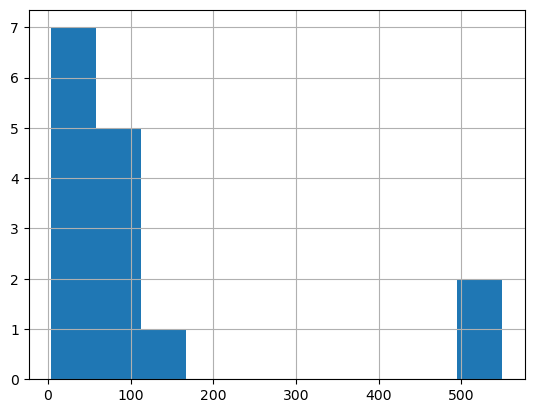

In [3]:
print("Number of valid logsum OD pairs: ", (logsums.logsum < np.inf).sum())
print(logsums[logsums.logsum < np.inf].describe())

# plot a histogram of the logsums
logsums[logsums.logsum < np.inf].logsum.hist(bins=10)


In [4]:
edges.columns

Index(['fromNode', 'toNode', 'bikeClass', 'lanes', 'functionalClass',
       'centroidConnector', 'autosPermitted', 'cycleTrack', 'bikeBlvd',
       'distance', 'gain', 'angle', 'majorArterial', 'arterial', 'dupMajArts',
       'dupArts'],
      dtype='object')

In [5]:
shortest_path_df.columns


Index(['origin', 'destination', 'iteration', 'prev_node', 'from_node',
       'to_node', 'path_size'],
      dtype='object')

In [6]:
shortest_path_df = shortest_path_df.merge(edges[['fromNode','toNode','distance']],left_on=['from_node','to_node'],right_on=['fromNode','toNode'])

Plotting the shortest path...


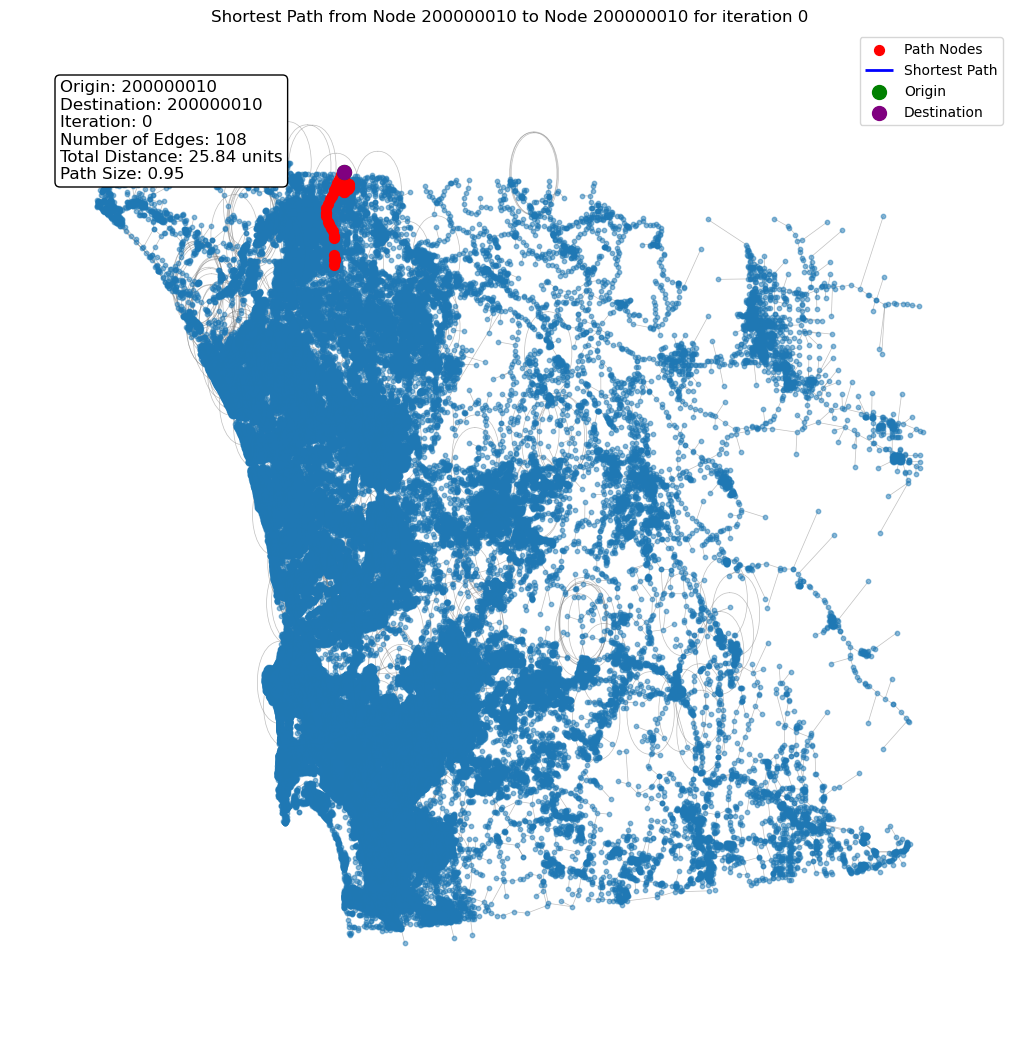

In [7]:
plot_shortest_path_with_results_buffered(
    nodes=nodes,
    edges=edges,
    shortest_path_df=shortest_path_df,
    origin=shortest_path_df['origin'].iloc[0],
    destination=shortest_path_df['destination'].iloc[0],
    iteration=0,
    buffer_size=None
)